11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.8448 - loss: 0.5371 - val_accuracy: 0.9740 - val_loss: 0.0994
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 56ms/step - accuracy: 0.9703 - loss: 0.1029 - val_accuracy: 0.9812 - val_loss: 0.0656
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9825 - loss: 0.0575 - val_accuracy: 0.9852 - val_loss: 0.0541
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9885 - loss: 0.0397 - val_accuracy: 0.9842 - val_loss: 0.0591
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9910 - loss: 0.0322 - val_accuracy: 0.9842 - val_loss: 0.0558
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9932 - loss: 0.0230 - val_accuracy: 0.9857 - val_loss: 0.0580
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9935 - loss: 0.0214 - val_accuracy: 0.9852 - val_loss: 0.0533
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9959 - loss: 0.0149 - 

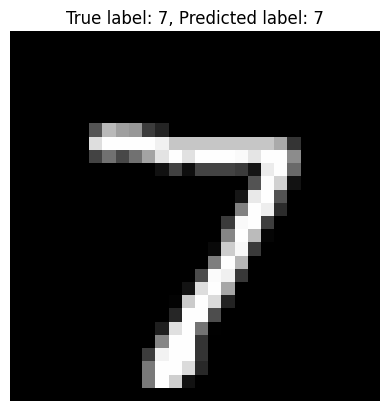

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,
28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

3


predictions = model.predict(x_test[:1])

predicted_label = np.argmax(predictions[0])

plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("True label: %d, Predicted label: %d" % (np.argmax(y_test[0]), predicted_label))
plt.axis('off')
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 45ms/step - accuracy: 0.3498 - loss: 1.7500 - val_accuracy: 0.5390 - val_loss: 1.2857
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.5631 - loss: 1.2265 - val_accuracy: 0.6123 - val_loss: 1.0897
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.6247 - loss: 1.0681 - val_accuracy: 0.6547 - val_loss: 0.9715
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6589 - loss: 0.9603 - val_accuracy: 0.6416 - val_loss: 1.0151
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.6857 - loss: 0.8961 - val_accuracy: 0.6878 - val_loss: 0.8898
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7047 - loss: 0.8500 - val_accuracy: 0.7012 - val_loss: 0.8475
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7193 - loss: 0.8002 - val_accuracy: 0.6969 - val_loss: 0.8616
Epoch 8/10
1563/1563 ━━

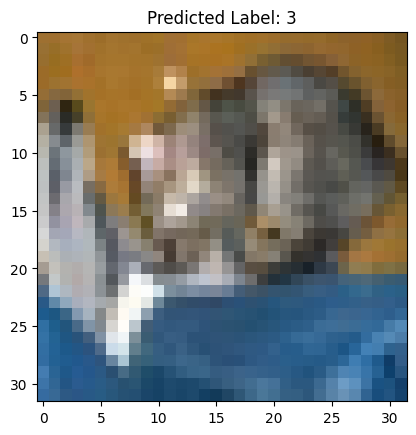

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0


model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3, 3), activation='relu'),


    layers.Dropout(0.25),


    layers.Flatten(),


    layers.Dense(64, activation='relu'),


    layers.Dense(10)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

predictions = model.predict(test_images)


image_index = 0
plt.imshow(test_images[image_index])
plt.title(f"Predicted Label: {predictions[image_index].argmax()}")
plt.show()


